In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math

In [0]:
#Generating data
def gen_data1():
  mean = [0.5, 0.5]
  cov = [[0.01, 0], [0, 0.01]]
  label1=np.ones(100)
  import matplotlib.pyplot as plt
  input1=np.random.multivariate_normal(mean, cov, 100)
  x1, y1 = np.random.multivariate_normal(mean, cov, 100).T
  plt.plot(x1,y1, '*')
  mean = [-0.5, -0.5]
  cov = [[0.01, 0], [0, 0.01]]
  label2=np.linspace(-1, -1, 100)
  input2=np.random.multivariate_normal(mean, cov, 100)
  x2, y2 = np.random.multivariate_normal(mean, cov, 100).T
  plt.plot(x2,y2, '*')
  x=np.concatenate((x1,x2),axis=0)
  y=np.concatenate((y1,y2),axis=0)
  label=np.concatenate((label1,label2),axis=0)
  return x, y, label,input1,input2



  
  

(160, 2)


numpy.ndarray

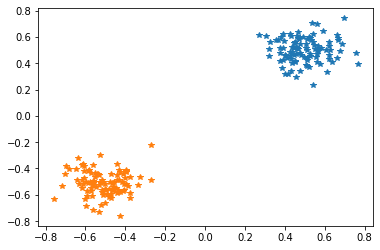

In [45]:
x, y, label,input1,input2 = gen_data1()
X=np.asarray([x,y])
X=X.T
label=label
#print(label.shape)
#print(X.shape)
w=np.zeros(2)
w.shape
t_index = int(0.8 * len(X))
X_train, X_test = X[:t_index], X[t_index:]
print(X_train.shape)
y_train, y_test = label[:t_index], label[t_index:]
X_train.shape

type(y_train)




In [0]:
#computing loss
def computeLoss(X, y, w):
    z = np.dot(X, w)
    h = 1 / (1 + np.exp(-z))
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

In [0]:
def gradientDescent(X,y,w,eta,epochs):
    cost = np.zeros(epochs)
    for i in range(epochs):
      z = np.dot(X,w)
      h = 1 / (1 + np.exp(-z))
      w = w - eta*(np.dot(X.T, (h - y)) / y.shape[0])
      cost[i] = computeLoss(X, y, w)
      if (cost[i] < 0):
        break;
    return w,cost

In [48]:
#Computing weights using gradient descent
w1=np.zeros(2)
eta = 0.011
epochs= 150 
newW, cost_history = gradientDescent(X_train, y_train, w1,eta,epochs)
print(newW)
# Final W
print(cost_history[-1])

[0.66807009 0.65944732]
0.15755909843346955


Text(0.5, 1.0, 'Loss vs. No.of Interations')

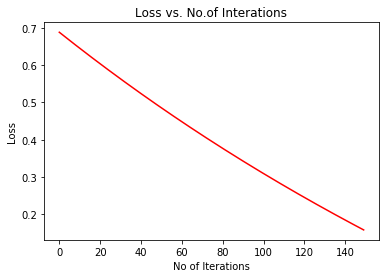

In [49]:
figure, plot = plt.subplots()  
plot.plot(np.arange(epochs), cost_history, 'r')  
plot.set_xlabel('No of Iterations')  
plot.set_ylabel('Loss')  
plot.set_title('Loss vs. No.of Interations') 

In [0]:
def stochasticGradientDescent(X,y,w,eta,epochs):
    train_data = np.concatenate((X,y[:,None]),axis=1)
    cost = np.zeros(epochs)
    for i in range(epochs):
        train_data1 = pd.DataFrame(train_data)
        train_sample = train_data1.sample(50)
        X = train_sample[[0,1]].to_numpy()
        y = train_sample[2].to_numpy()
        z = np.dot(X,w )
        h = 1 / (1 + np.exp(-z))
        w = w - eta*(np.dot(X.T, (h - y)) / y.shape[0])
        cost[i] = computeLoss(X, y, w)
    return w,cost

In [51]:
#Computing cost using stochastic gradient Descent
w_new = np.zeros(2)
eta_new = 0.011
epochs_new= 150 #No. of iterations
newW_new, cost_history_new = stochasticGradientDescent(X_train, y_train, w_new,eta_new,epochs_new)
print(newW_new)
# W
print(cost_history_new)

[0.67100735 0.66377144]
[0.68879895 0.68291502 0.67796604 0.67259435 0.66583204 0.66767146
 0.66041728 0.66000223 0.65149216 0.64880811 0.64346668 0.64405413
 0.63373354 0.63676279 0.62732869 0.6240644  0.61965787 0.6180078
 0.61271989 0.61417762 0.60955717 0.60650964 0.59571786 0.59517093
 0.59249929 0.58515857 0.5703159  0.55801625 0.5644592  0.56216125
 0.56582666 0.55733013 0.55168767 0.54040719 0.54080725 0.52711639
 0.52573323 0.53230121 0.53285597 0.53667248 0.51207238 0.51972632
 0.5082842  0.51636579 0.48455221 0.49382923 0.51323088 0.49893326
 0.49507497 0.48720187 0.49223716 0.48104575 0.45324301 0.47262466
 0.45468211 0.48843302 0.44757856 0.47916706 0.45622964 0.41039682
 0.44846959 0.42820579 0.44917645 0.42365865 0.42013763 0.41847996
 0.44521766 0.40983232 0.43028071 0.39098371 0.42764057 0.40200294
 0.3903577  0.36632212 0.38333496 0.39787498 0.41054872 0.4069946
 0.36328493 0.37370761 0.39563795 0.36876617 0.35033942 0.39249342
 0.35498389 0.34386851 0.32129392 0.3473

Text(0.5, 1.0, 'Loss vs. No.of Interations')

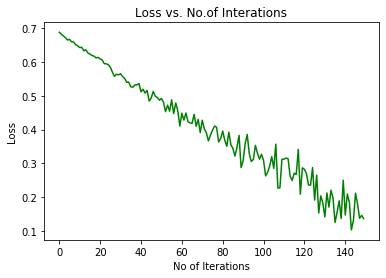

In [52]:
figure, plot = plt.subplots()  
plot.plot(np.arange(epochs_new), cost_history_new, 'g')  
plot.set_xlabel('No of Iterations')  
plot.set_ylabel('Loss')  
plot.set_title('Loss vs. No.of Interations') 

Text(0.5, 1.0, 'Loss vs. No.of Interations')

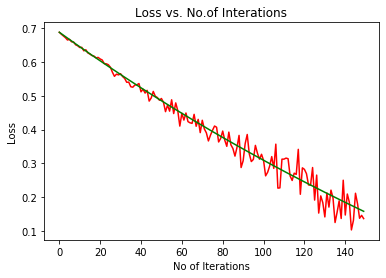

In [53]:
figure, plot = plt.subplots()  
plot.plot(np.arange(epochs_new), cost_history_new, 'r') 
plot.plot(np.arange(epochs), cost_history, 'g')  
plot.set_xlabel('No of Iterations')  
plot.set_ylabel('Loss')  
plot.set_title('Loss vs. No.of Interations') 

In [0]:
X_1 = x
X_2 = y
x_values = [np.max(X_1), np.min(X_2)]
y_values_gd = - (np.dot(newW[0], x_values)) / newW[1]
y_values_sgd = - (np.dot(newW_new[0], x_values)) / newW_new[1]

Text(0.5, 1, 'GD')

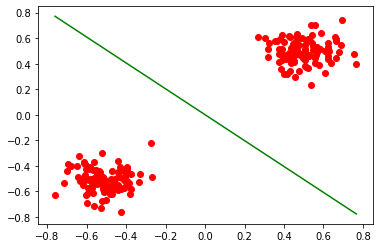

In [55]:
#Plots of Gradient Descent And Stochastic Gradient Descent
plt.scatter(x,y,c='red')
plt.plot(x_values,y_values_gd,c='green')
plot.set_title('GD') 

Text(0.5, 1, 'SGD')

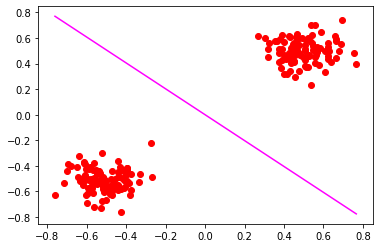

In [56]:
plt.scatter(x,y,color='r')
plt.plot(x_values,y_values_sgd,color='magenta')
plot.set_title('SGD') 